In [1]:
import cv2
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
# loading datasets
# 60000 images of 28x28 pixels (60000 rows, 785 columns) of values ranging from 0 to 255
train_df = pd.read_csv('./inputs/mnist_train.csv', header=None)
# 10000 images of 28x28 pixels (10000 rows, 785 columns) of values ranging from 0 to 255
test_df = pd.read_csv('./inputs/mnist_test.csv', header=None)

In [3]:
# visual of rows and columns of training data
print('traing data shape:', train_df.shape)
# visual of rows and columns of test data
print('test data shape:', test_df.shape)

# visual of first 5 rows training data
train_df.head()
# visual of first 5 rows test data
test_df.head()

traing data shape: (60000, 785)
test data shape: (10000, 785)


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# training features without labels
x_train = train_df.drop(0, axis=1).values
# scale from 0 to 1
x_train = x_train / 255
# training labels only
y_train = train_df[0].values

# test features without labels
x_test = test_df.drop(0, axis=1).values
# scale from 0 to 1
x_test = x_test / 255
# test labels only
y_test = test_df[0].values

sample label: 5


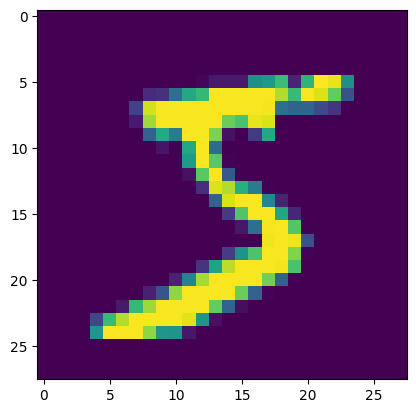

In [6]:
# label and visual of a sample training image
def sample(i):
    print('sample label:', y_train[i])
    plt.imshow(x_train[i].reshape(28, 28))

sample(0)

In [7]:
# building the model
model = keras.Sequential([
    keras.layers.Dense(128, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy']
             )

# training the model
model.fit(x_train, y_train, epochs=15) # shuffling inputs is recommended

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2549 - accuracy: 0.9261
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1131 - accuracy: 0.9667
Epoch 3/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0785 - accuracy: 0.9768
Epoch 4/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0596 - accuracy: 0.9817
Epoch 5/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0455 - accuracy: 0.9862
Epoch 6/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0370 - accuracy: 0.9887
Epoch 7/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0286 - accuracy: 0.9909
Epoch 8/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0235 - accuracy: 0.9924
Epoch 9/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0195 - accuracy: 0.9936
Epoch 10/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.015

In [8]:
# evaluate the model with test dataset
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0953 - accuracy: 0.9770


[0.09531286358833313, 0.9769999980926514]

313/313 [==============================] - 0s 1ms/step
actual label: 4
predicted label: 4


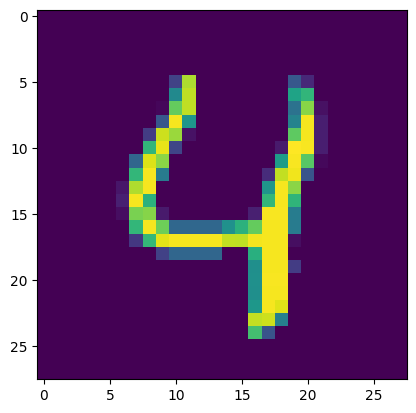

In [9]:
# run prediction on test image
def predict_test_img(i):
    y_pred = model.predict(x_test)
    print('actual label:', y_test[i])
    print('predicted label:', np.argmax(y_pred[i]))
    plt.imshow(x_test[i].reshape(28, 28))

predict_test_img(4)

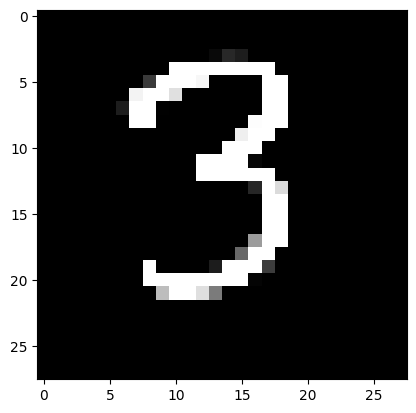

In [13]:
# converting handwritten image to 28x28
# load sample image
file = './inputs/handwritten_three.png'
test_image = cv2.imread(file, cv2.IMREAD_GRAYSCALE)

# preview sample image
# plt.imshow(test_image, cmap='gray')

# format Image
img_resized = cv2.resize(test_image, (28, 28), interpolation=cv2.INTER_LINEAR)
img_reversed = cv2.bitwise_not(img_resized)

# Preview reformatted image
plt.imshow(img_reversed, cmap='gray')

In [14]:
# run prediction on user image
def predict_user_img(img):
    img_final = np.reshape(img, (1, 784))
    y_img_pred = model.predict(img_final)
    print('predicted label:', np.argmax(y_img_pred))
    #plt.imshow(img, cmap='gray')

predict_user_img(img_reversed)

1/1 [==============================] - 0s 21ms/step
predicted label: 3
